<a href="https://colab.research.google.com/github/Margo-s-M/AI_Colab/blob/main/%D0%94%D0%97_7%D0%A1%D0%BE%D0%B1%D1%87%D0%B5%D0%BD%D0%BA%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/House_Rent_Dataset.csv", index_col="Unnamed: 0")

[Інформація про дані](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset)

In [ ]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2.0,10000.0,1100.0,Ground out of 2,NaN,NaN,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2022-05-13,2.0,20000.0,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,NaN
2,2022-05-16,2.0,17000.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2022-07-04,2.0,10000.0,800.0,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,NaN,2.0,7500.0,850.0,1 out of 2,Carpet Area,NaN,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [ ]:
#df = df[['Size', 'Furnishing Status', 'City', 'Rent']]
#df.head()

# Завдання 1
Ввиведіть основні числові характеристики даних, розділіть на тренувальну та тестову чатини. Цільова ознака `Rent`

In [ ]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4342.000000,4.369000e+03,4402.000000,4387.000000
mean,2.082220,3.461306e+04,967.214675,1.970139
std,0.827656,7.740818e+04,636.118893,0.886784
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [ ]:
df.dtypes

,0
Posted On,object
BHK,float64
Rent,float64
Size,float64
Floor,object
Area Type,object
Area Locality,object
City,object
Furnishing Status,object
Tenant Preferred,object


<Axes: >

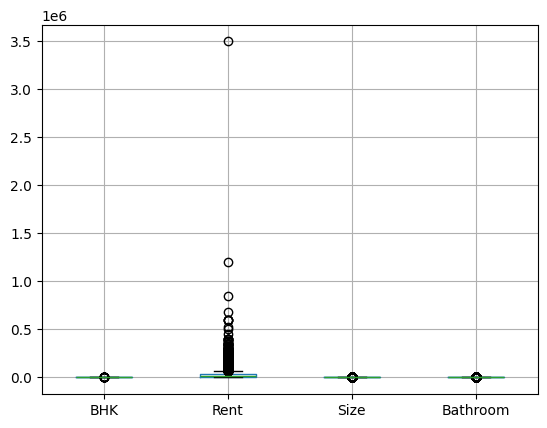

In [ ]:
df.boxplot()

In [ ]:
mask = df['Rent'] < 2e6
df = df[mask]

In [ ]:
y = df['Rent']
X = df.drop(columns='Rent')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)
X.head()

,Posted On,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2.0,1100.0,Ground out of 2,NaN,NaN,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2022-05-13,2.0,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,NaN
2,2022-05-16,2.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2022-07-04,2.0,800.0,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,NaN,2.0,850.0,1 out of 2,Carpet Area,NaN,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [ ]:
y.head()

,Rent
0,10000.0
1,20000.0
2,17000.0
3,10000.0
4,7500.0


# Завдання 2
Створіть Pipeline для обробки числових стовпчиків(заповнення пропусків)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
num_columns = X_train.select_dtypes(include='number').columns
cat_columns = X_train.select_dtypes(include='object').columns

In [ ]:
num_pipline = Pipeline(
    [
        ('impute', SimpleImputer(strategy='mean'))
    ]
)
num_pipline

Pipeline(steps=[('impute', SimpleImputer())])

# Завдання 3
Створіть Pipeline для обробки категоріальних стовпчиків(заповнення пропусків та кодування)

In [ ]:
cat_pipline = Pipeline(
    [
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ]
)
cat_pipline


Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

# Завдання 4
Об'єднайте попередні Pipeline в один ColumnTransformer

In [ ]:
preprocessor = ColumnTransformer(
    [
        ('num',num_pipline, num_columns),
        ('cat', cat_pipline, cat_columns)
    ]
)
preprocessor.set_output(transform='pandas')

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer())]),
                                 Index(['BHK', 'Size', 'Bathroom'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object'))])

In [ ]:
#preprocessor.transform(X_train)

# Завдання 5
Створіть остаточну модель та натренуйте її

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
full_model =Pipeline(
    [
    ('prep', preprocessor),
    ('linear_regression', LinearRegression())
    ]
)

full_model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  Index(['BHK', 'Size', 'Bathroom'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object'))])),
                ('linear_regression', LinearRegression())])

# Завдання 6
Виведіть основні метрики моделі

In [ ]:
full_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  Index(['BHK', 'Size', 'Bathroom'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object'))])),
                ('linear_regression', LinearRegression())])

In [ ]:
from sklearn import metrics

y_train_pred = full_model.predict(X_train)

metrics.r2_score(y_train_pred, y_train)

0.8801105778012899

# Завдання 7
Спрогнозуйте ціну будинку

In [ ]:
df.columns

Index(['Size', 'Furnishing Status', 'City'], dtype='object')

In [ ]:
data = pd.DataFrame({'Size': [900],
                     'Furnishing Status': ['Semi-Furnished'],
                     'City': ['Kolkata']})

data

,Size,Furnishing Status,City
0,900,Semi-Furnished,Kolkata


In [ ]:
full_model.predict(data)




ValueError: columns are missing: {'BHK', 'Posted On', 'Area Locality', 'Bathroom', 'Point of Contact', 'Tenant Preferred', 'Floor', 'Area Type'}